In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\hdrpv\AppData\Local\Temp\ipykernel_8112\1041966425.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:
# Data Generate X,Y 
def generateDataset(m, numFeatures):
    np.random.seed(0)
    X = np.random.randn(m, numFeatures)*10
    trueTheta = np.random.randn(numFeatures)
    noise = np.random.randn(m)
    y = np.dot(X, trueTheta) + 1 + 5 * noise
    return X,y

In [5]:
X,y = generateDataset(100, 3)
print(X.shape,y.shape)

(100, 3) (100,)


In [7]:
from sklearn.model_selection import train_test_split
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80, 3) (80,)
(20, 3) (20,)


In [9]:
def hypothesis(X,theta):
    return np.dot(X, theta)

def error(X,y,theta):
    m = X.shape[0]
    y_pred = hypothesis(X, theta)
    return np.sum((y_pred - y) ** 2) / (2 * m)

def gradient(X,y,theta):
    m = X.shape[0]
    y_pred = hypothesis(X, theta)
    error = y_pred - y
    grad = np.dot(X.T, error) / m
    return grad


def train(X,y,learning_rate = 0.1,maxItrs = 100):
    numFeatures = X.shape[1]
    theta = np.zeros(numFeatures)
    error_list = []
    
    for i in range(maxItrs):
        grad = gradient(X, y, theta)
        error_list.append(error(X,y,theta))
        theta -= learning_rate * grad

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta

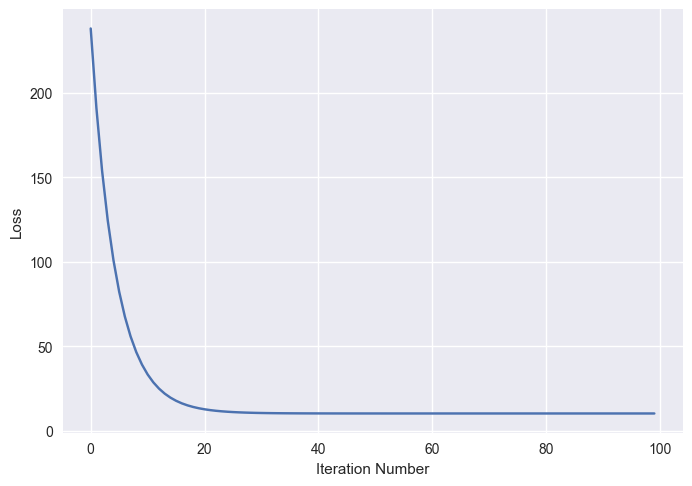

In [11]:
theta = train(X,y, learning_rate = 0.001)

In [12]:
theta

array([-1.26044862,  1.61258782, -0.14288411])

In [13]:
def predict(X,theta):
    return hypothesis(X,theta)

ValueError: x and y must be the same size

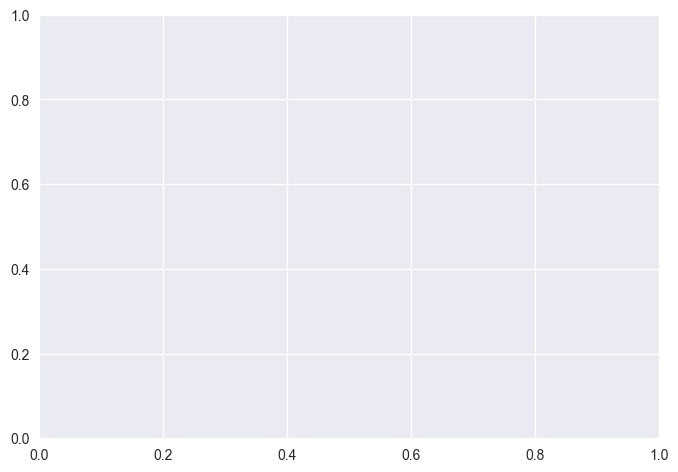

In [14]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')
plt.show()

In [15]:
yp = predict(Xt,theta)

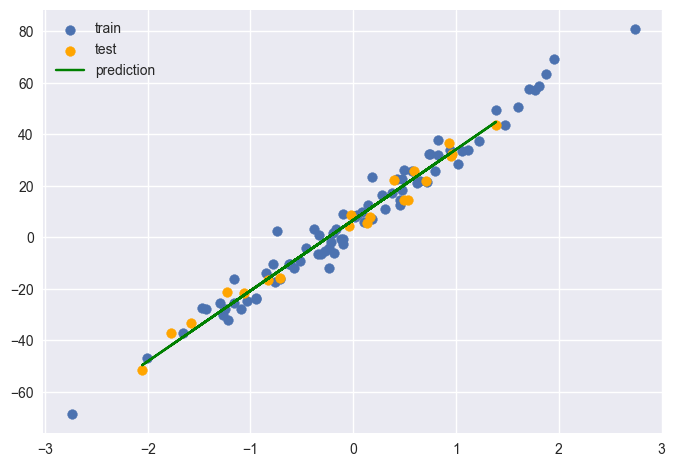

In [21]:
plt.scatter(XT,yT,label="train")
plt.scatter(Xt,yt,color='orange',label="test")
plt.plot(Xt,yp,color='green',label="prediction")
plt.legend()
plt.show()

In [16]:
# Model Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y - ymean)**2)
    return 1 - num/denom 

r2Score(yt,yp)

0.9288994212975642

In [17]:
#Idher tak hi kiya hai maine

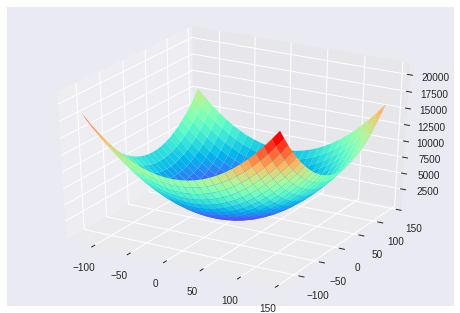

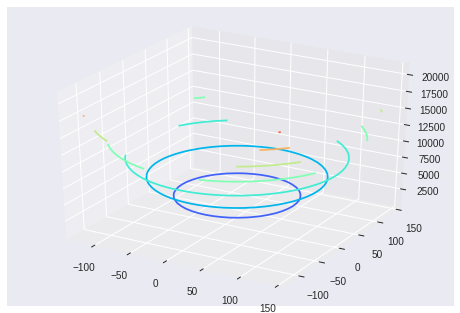

In [ ]:
# Visualising the training process 
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2


fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()


In [ ]:
# Trace the trajectory of gradient 
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.array([-150,100])
    error_list = []
    # note down values of theta
    theta_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    return theta, theta_list, error_list


In [ ]:
theta, theta_list, error_list = train(XT,yT)

In [ ]:
theta_list = np.array(theta_list)

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


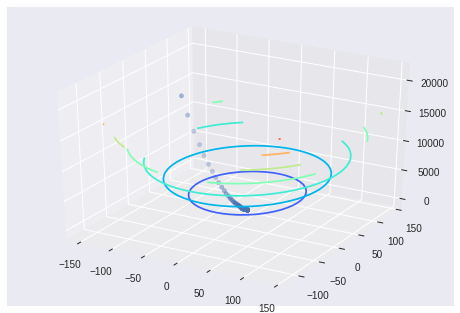

In [ ]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()

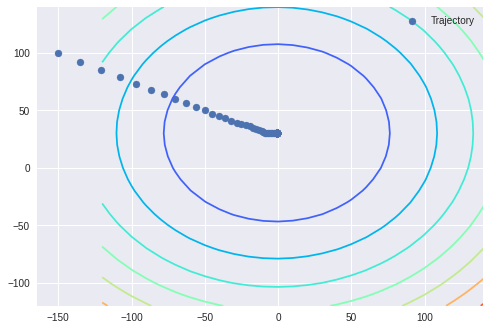

In [ ]:
# 2D Contour Plot (Top View)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],label='Trajectory')
plt.legend()
plt.show()

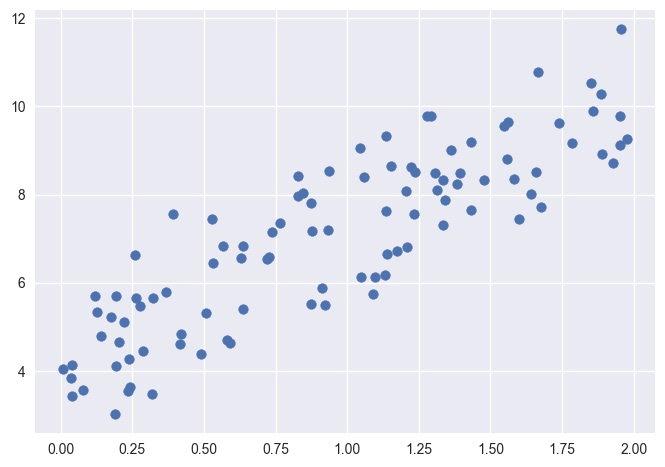

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X,y)
plt.show()

In [40]:
# Add a bias term to X (X0 = 1)
X_b = np.c_[np.ones((100, 1)), X]
#plt.scatter(X_b,y)
#plt.show()
print(X_b.shape, y.shape)

(100, 2) (100, 1)


[[ 0.62523145]
 [-1.60205766]]
//////
[[2.20898183]
 [0.19943085]]
[[3.13528907]
 [1.25946058]]
[[3.67586465]
 [1.88426133]]
[[3.99016434]
 [2.25355272]]
[[4.17176461]
 [2.47280942]]
[[4.27557954]
 [2.60393395]]
[[4.33383354]
 [2.6832576 ]]
[[4.36543524]
 [2.7321046 ]]
[[4.38147878]
 [2.76299195]]
[[4.38847227]
 [2.78326785]]
[[4.39023253]
 [2.79724705]]
[[4.38899703]
 [2.80746395]]
[[4.38607644]
 [2.81540809]]
[[4.38223759]
 [2.82195569]]
[[4.37792824]
 [2.82762302]]
[[4.37340897]
 [2.832715  ]]
[[4.36883057]
 [2.83741248]]
[[4.36427948]
 [2.84182343]]
[[4.35980441]
 [2.84601297]]
[[4.35543205]
 [2.85002104]]
[[4.35117616]
 [2.85387273]]
[[4.34704303]
 [2.85758438]]
[[4.34303458]
 [2.86116714]]
[[4.33915026]
 [2.86462903]]
[[4.3353881 ]
 [2.86797624]]
[[4.33174536]
 [2.8712138 ]]
[[4.32821888]
 [2.87434602]]
[[4.32480535]
 [2.87737676]]
[[4.32150135]
 [2.88030956]]
[[4.31830351]
 [2.88314772]]
[[4.31520849]
 [2.88589438]]
[[4.31221304]
 [2.88855255]]
[[4.30931397]
 [2.89112511]]
[[4.3

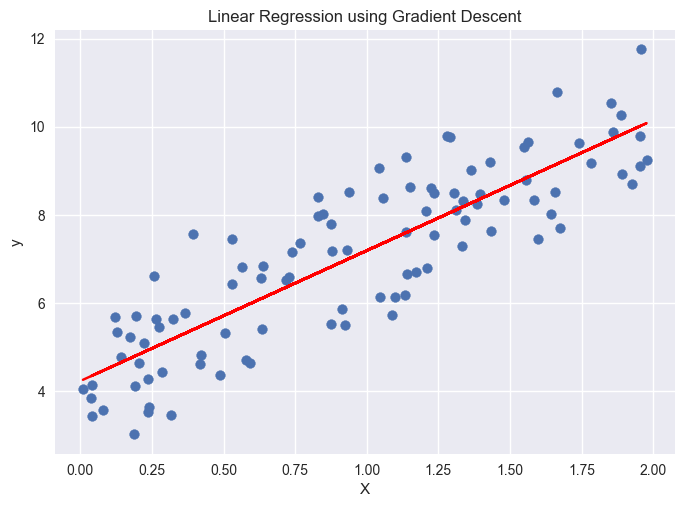

In [43]:

# Gradient Descent Parameters
eta = 0.1  # learning rate
n_iterations = 100
m = 100  # number of instances

# Initialize theta with random values
theta = np.random.randn(2, 1)
print(theta)
print("//////")
# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    print(theta)
# Final theta values (intercept and slope)
intercept, slope = theta

# Print the final parameters
print("Intercept:", intercept)
print("Slope:", slope)

# Plot the data and the linear regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.show()
